## Nhập thư viện:

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

## Đọc dữ liệu:

In [4]:
df = pd.read_csv('../Datasets/data_cleaned.csv')
df.head()

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Previous Purchases,Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Express,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Express,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Free Shipping,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,Next Day Air,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Free Shipping,Yes,31,PayPal,Annually


## Phân tích doanh thu của từng danh mục theo mùa

### Lựa chọn thuộc tính:

- `Category` – Danh mục sản phẩm (quần áo, điện tử, thực phẩm, v.v.)

- `Season` – Mùa (Xuân, Hạ, Thu, Đông)

- `Purchase Amount` (USD) – Tổng số tiền chi tiêu cho từng loại sản phẩm trong từng mùa

In [5]:
# Hiển thị các giá trị duy nhất trong cột 'Category' dưới dạng danh sách
unique_categories_list = df['Category'].unique().tolist()
print(unique_categories_list)

demographic_df = df[['Category', 'Season', 'Purchase Amount (USD)']]
demographic_df.sample(10)

['Clothing', 'Footwear', 'Outerwear', 'Accessories']


,Category,Season,Purchase Amount (USD)
2309,Clothing,Fall,95
2377,Clothing,Fall,94
3818,Footwear,Winter,41
2409,Accessories,Spring,37
329,Clothing,Summer,31
458,Clothing,Winter,91
1109,Clothing,Winter,97
53,Clothing,Winter,24
3874,Clothing,Summer,54
2627,Clothing,Fall,26


### Lựa chọn các biểu đồ:

#### Biểu đồ cột **(Bar Chart)**

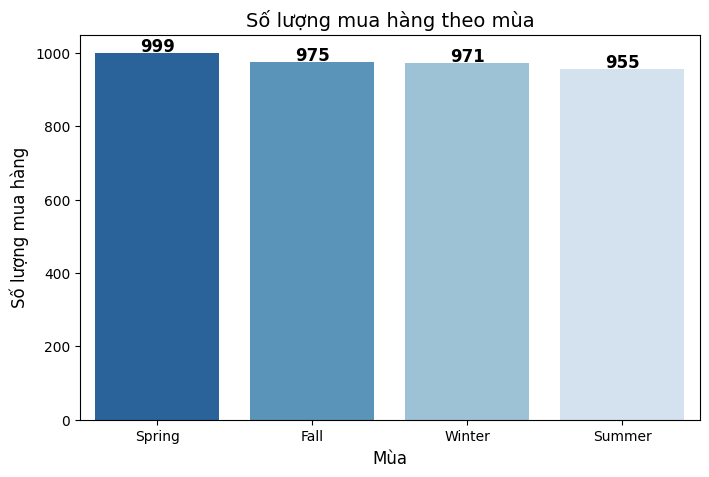

In [12]:
# Đếm số lượng mua hàng theo mùa
season_count = df['Season'].value_counts()

# Vẽ biểu đồ cột
plt.figure(figsize=(8, 5))
ax = sns.barplot(x=season_count.index, y=season_count.values, palette="Blues_r")

# Hiển thị số lượng trên đầu mỗi cột
for i, value in enumerate(season_count.values):
    plt.text(i, value + 5, str(value), ha='center', fontsize=12, fontweight='bold')

# Thiết lập tiêu đề và nhãn
plt.title("Số lượng mua hàng theo mùa", fontsize=14)
plt.xlabel("Mùa", fontsize=12)
plt.ylabel("Số lượng mua hàng", fontsize=12)

plt.show()

##### Nhận xét:
Dựa trên biểu đồ Bar và Line chart cho thấy:
- số lượng mua hàng theo mua không có sự chênh lệch lớn.
- Mùa Xuân cao nhất, cao hơn mùa thấp nhất là mùa hè 44 lượt.
##### Kết luận: 
- Có thể thấy rằng mùa xuân là mùa mua sắm mạnh nhất, có thể do các dịp lễ hội hoặc các chương trình khuyến mãi đặc biệt vào thời điểm này.
- Mùa hè có thể là thời điểm khách hàng ít mua sắm hơn, có thể do họ tập trung vào các hoạt động du lịch hoặc nghỉ ngơi.

#### Biểu đồ hộp **(boxplot)** - Giá trị mua hàng trung bình theo mùa

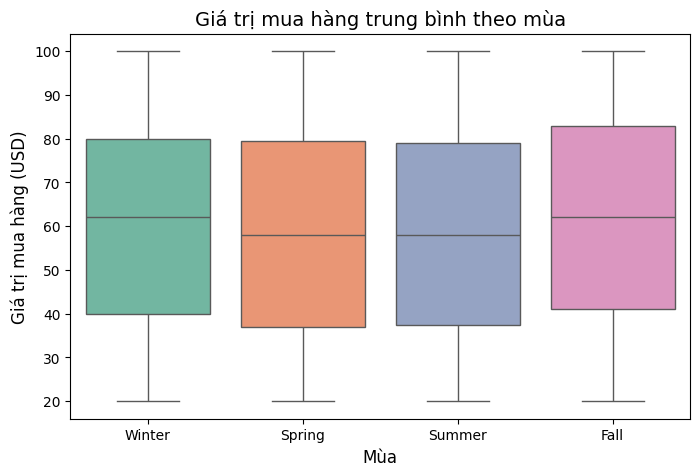

In [13]:
plt.figure(figsize=(8, 5))
sns.boxplot(x="Season", y="Purchase Amount (USD)", data=df, palette="Set2")
plt.title("Giá trị mua hàng trung bình theo mùa", fontsize=14)
plt.xlabel("Mùa", fontsize=12)
plt.ylabel("Giá trị mua hàng (USD)", fontsize=12)
plt.show()

##### Nhận xét:
Dựa trên biểu đồ Bar và Line chart cho thấy:
- Mùa thu (Fall) có giá trị mua hàng trung bình cao nhất, với trung vị cao nhất và phạm vi phân phối rộng nhất.
- Mùa đông (Winter) cũng có giá trị mua hàng trung bình khá cao, tương đương với mùa thu.
- Mùa xuân (Spring) và mùa hè (Summer) có giá trị mua hàng trung bình thấp hơn, với mùa hè có trung vị thấp nhất trong bốn mùa.
- Sự khác biệt về giá trị mua hàng trung bình giữa các mùa không quá lớn, nhưng vẫn có thể nhận thấy một số xu hướng.
##### Kết luận: 
- Tất cả các mùa đều có phạm vi phân phối giá trị mua hàng tương đối rộng, cho thấy sự biến động trong chi tiêu của khách hàng.
- Biểu đồ không hiển thị rõ ràng các giá trị ngoại lệ (outliers), nhưng phạm vi phân phối rộng cho thấy có thể có những giao dịch có giá trị mua hàng cao hoặc thấp bất thường.

#### Biểu đồ **Bar & Line Chart**:
- **Biểu đồ cột**: Giúp thể hiện rõ sự khác biệt về doanh thu của từng danh mục sản phẩm (Phụ kiện, Quần áo, Giày dép, Áo khoác) theo từng mùa.
- **Biểu đồ đường**: Hiển thị tổng doanh thu theo mùa, giúp quan sát xu hướng doanh thu tổng thể.
- Kết hợp hai loại biểu đồ giúp dễ dàng so sánh chi tiết từng danh mục với tổng thể, đồng thời nhận diện xu hướng doanh thu theo mùa.

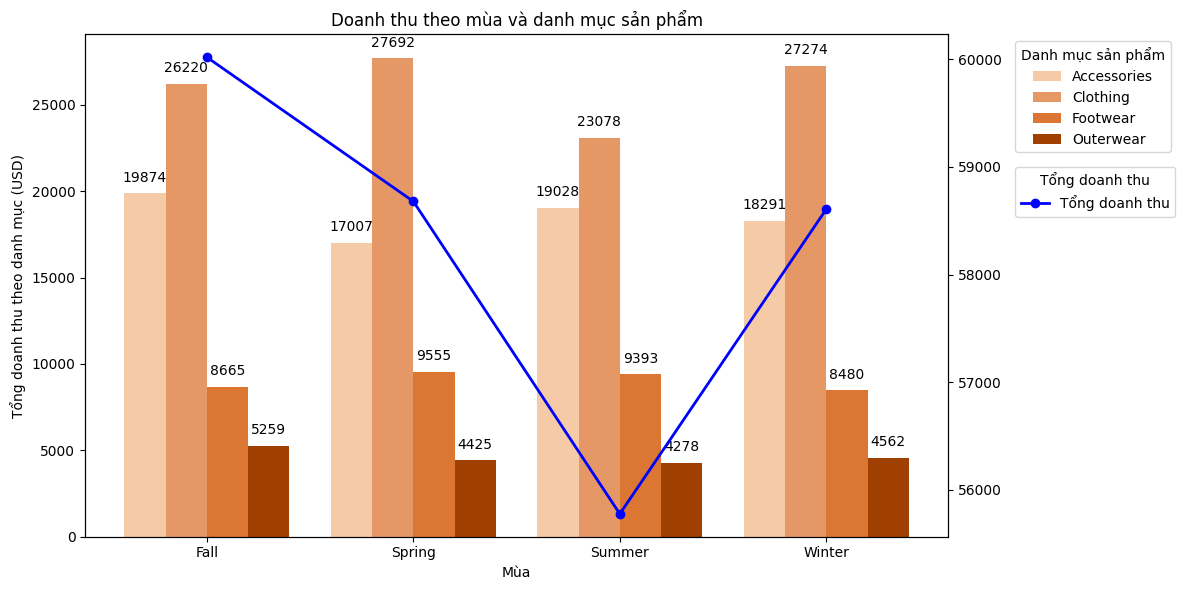

In [6]:
# Nhóm dữ liệu theo Mùa và Danh mục sản phẩm
grouped_data = demographic_df.groupby(['Season', 'Category'])['Purchase Amount (USD)'].sum().unstack(fill_value=0)

# Tính tổng doanh thu theo mùa
total_revenue = demographic_df.groupby('Season')['Purchase Amount (USD)'].sum()

# Vẽ biểu đồ
fig, ax1 = plt.subplots(figsize=(12, 6))

# Xác định vị trí cột trên trục x
mua = grouped_data.index
danh_muc = grouped_data.columns
x = np.arange(len(mua))  # Vị trí của từng mùa
width = 0.2  # Độ rộng của từng cột

# Danh sách màu sắc cho các danh mục sản phẩm
mau_sac = ['#F5CBA7', '#E59866', '#DC7633', '#A04000']

# Vẽ cột cho từng danh mục sản phẩm
for i, dm in enumerate(danh_muc):
    bars = ax1.bar(x + i * width, grouped_data[dm], width, label=dm, color=mau_sac[i])
    # Hiển thị số liệu trên từng cột, lùi lên một chút để tránh đè
    for bar in bars:
        cao = bar.get_height()
        ax1.text(bar.get_x() + bar.get_width() / 2, cao + 500, f'{int(cao)}', ha='center', va='bottom', fontsize=10)

# Vẽ đường tổng doanh thu
ax2 = ax1.twinx()
ax2.plot(x + width * 1.5, total_revenue.values, color='blue', marker='o', linestyle='-', linewidth=2, label='Tổng doanh thu')

# Thiết lập trục x và nhãn
ax1.set_xticks(x + width * 1.5)
ax1.set_xticklabels(mua)
ax1.set_xlabel("Mùa")
ax1.set_ylabel("Tổng doanh thu theo danh mục (USD)")
ax1.set_title("Doanh thu theo mùa và danh mục sản phẩm")

# Đưa chú thích ra ngoài biểu đồ
ax1.legend(title="Danh mục sản phẩm", bbox_to_anchor=(1.07, 1), loc="upper left")
ax2.legend(title="Tổng doanh thu", bbox_to_anchor=(1.07, 0.75), loc="upper left")

# Hiển thị biểu đồ
plt.tight_layout()  # Giúp bố cục gọn gàng hơn
plt.show()


##### Nhận xét:
Dựa trên biểu đồ Bar và Line chart cho thấy:

1. Doanh thu theo danh mục sản phẩm.

    Tập trung nhiều nhất vào `Clothing (Quần áo)` sau đó đến `Accessories (Phụ kiện)`, `Footwear (Giày dép)`, thấp nhất và có sự chênh lệnh lớn là `Outerwear (Áo khoác ngoài)`.
- Sự ảnh hưởng theo mùa: 
    - Doanh thu của từng danh mục qua các mùa có sự chênh lệch nhẹ. 
    - `Clothing (Quần áo)` cao nhất ở mùa đông và mùa xuân. Mùa hè doanh thu thấp nhất và có sự chênh lệch khá cao so với 2 mùa còn lại. Điều này cho thấy nhu cầu mua sắm quần áo tăng cao vào những thời điểm này, do thời tiết lạnh hơn. 
    - `Accessories (Phụ kiện)`: Danh mục này tương đối là ổn định, giảm nhẹ vào mùa xuân. 
    - `Footwear (Giày dép)`: Có sự chênh lệnh nhẹ, doanh thu cao hơn vào mùa xuân và mùa hè.
    - `Outerwear (Áo khoác ngoài)`: Trong khi đó 3 mua còn lại không có sự chênh lệch lớn thì mùa thu có doanh thu cao nhất, đầy là thời điểm điểm giao giữa mùa hạ và mùa đông. Người dùng có nhu cầu áo khoắc nhiều hơn cho sự giảm nhiệt độ và cũng để chuẩn bị bước sang thời tiết lạnh của mùa đông. 

2. Tổng doanh thu.

    Đường biển diễn tổng doanh thu cho thấy sự biến động rõ rệt theo mùa.

    - Mùa thu có tổng doanh thu cao nhất, cho thấy đây là mùa mua sắp chính. 
    - Mùa hạ có tổng doanh thu thấp nhất, có thể do thời tiết nóng ảnh hưởng tới nhu cầu và xu hướng mua sắm của người tiêu dùng. 
    - Mùa đông và mua xuân tương đối đồng đều về doanh thu. 

##### Kết luận: 
- Tính mùa vụ rõ rệt: Biểu đồ cho thấy tính mùa vụ ảnh hưởng lớn đến doanh thu, đặc biệt là đối với các mặt hàng quần áo và áo khoác ngoài.
- Quần áo là động lực chính: Danh mục quần áo đóng vai trò quan trọng trong việc thúc đẩy tổng doanh thu.
- Mùa Thu và mùa Đông là mùa mua sắm trọng điểm: Doanh nghiệp nên tập trung vào các chiến lược marketing và bán hàng trong hai mùa này để tối đa hóa doanh thu.
- Mùa Hạ là mùa thấp điểm: Doanh nghiệp cần có các biện pháp để kích cầu mua sắm trong mùa này, có thể thông qua các chương trình   khuyến mãi hoặc giảm giá.

## Phân tích doanh thu của từng sản phẩm trong danh mục Clothing (Quần áo)

### Lựa chọn thuộc tính:

- `Category` – Danh mục sản phẩm (quần áo, điện tử, thực phẩm, v.v.)

- `Item Purchased` – Sản phâm đã mua ( Shirt, Dress, Blouse, v.v.)

- `Purchase Amount` (USD) – Tổng số tiền chi tiêu cho từng loại sản phẩm trong từng mùa

In [7]:
# Lọc dữ liệu chỉ lấy danh mục 'Clothing'
clothing_df = df[df['Category'] == 'Clothing']

demographic_df = clothing_df[['Item Purchased', 'Purchase Amount (USD)']]
demographic_df.sample(10)

,Item Purchased,Purchase Amount (USD)
0,Blouse,53
1967,Dress,81
1127,Shirt,53
2660,Pants,85
1051,Socks,53
3319,Shorts,31
3740,Pants,96
2573,T-shirt,90
721,Blouse,57
1190,Shirt,45


#### Biểu đồ **Horizontal bar chart**

- Trục tung (y-axis): Hiển thị tên của từng sản phẩm quần áo.
- Trục hoành (x-axis): Hiển thị doanh thu của từng sản phẩm, đơn vị là USD.
- Các cột ngang: Chiều dài của mỗi cột thể hiện giá trị doanh thu tương ứng của từng sản phẩm.
- Màu sắc: Màu sắc đậm hơn cho thấy doanh thu cao hơn.

Biểu đồ cột ngang là một lựa chọn phù hợp để so sánh các giá trị giữa các danh mục, đặc biệt khi tên danh mục dài hoặc có nhiều danh mục cần so sánh

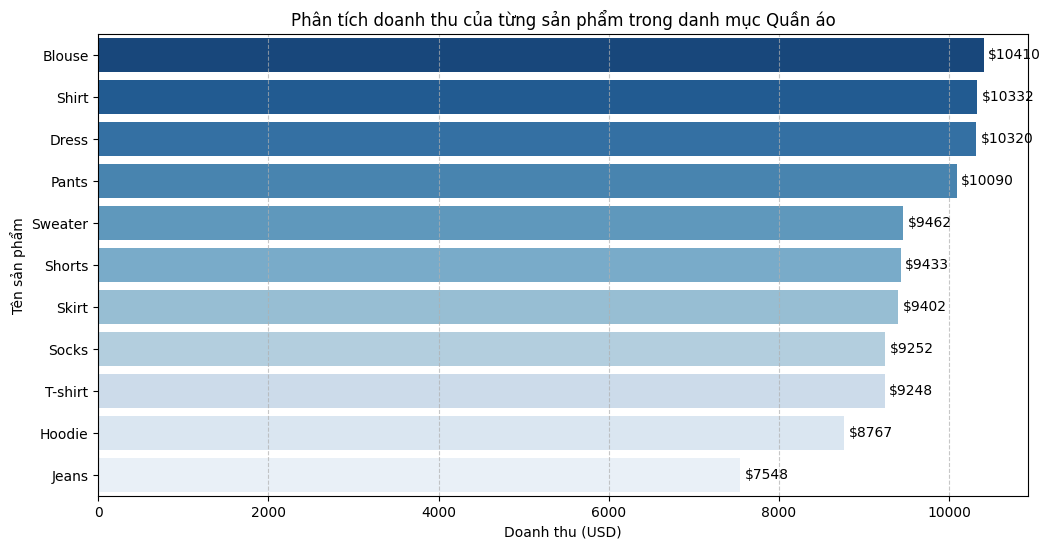

In [8]:
# Tính tổng doanh thu theo từng sản phẩm trong danh mục Clothing
total_revenue = clothing_df.groupby('Item Purchased')['Purchase Amount (USD)'].sum().reset_index()

# Lọc dữ liệu chỉ lấy danh mục 'Clothing'
clothing_df = df[df['Category'] == 'Clothing']

# Tính tổng doanh thu theo từng sản phẩm trong danh mục Clothing
total_revenue = clothing_df.groupby('Item Purchased')['Purchase Amount (USD)'].sum().reset_index()
total_revenue = total_revenue.sort_values(by='Purchase Amount (USD)', ascending=False)

# Vẽ biểu đồ
plt.figure(figsize=(12, 6))
sns.barplot(data=total_revenue, x='Purchase Amount (USD)', y='Item Purchased', palette='Blues_r')
plt.xlabel('Doanh thu (USD)')
plt.ylabel('Tên sản phẩm')
plt.title('Phân tích doanh thu của từng sản phẩm trong danh mục Quần áo')
plt.grid(axis='x', linestyle='--', alpha=0.7)

# Hiển thị giá trị cụ thể trên cột
for index, value in enumerate(total_revenue['Purchase Amount (USD)']):
    plt.text(value + 50, index, f'${int(value)}', va='center', fontsize=10)

plt.show()

##### Nhận xét:

Đây là biểu đồ về doanh thu của từng sản phẩm trong doanh mục Clothing (Quần áo). Danh mục  đóng vai trò quan trọng trong việc thúc đẩy tổng doanh thu.

Dựa trên biểu đồ cho thấy: 
- Sự phân hóa khá rõ rệt
    - Nhóm sản phẩm chiếm doanh thu cao (Blouse, Shirt, Dress). Cho thấy đây là nhưng mặt hàng được ưu chuộng hơn. 
    - Nhóm sản phẩm có doanh thu thấp là (Hoodie, jeans) đặc biệt là jeans, sản phẩm có sự chênh lệch khá gần $3000 so với top đầu.

- Mức chênh lệch
    - Quần dài (Pants) và Quần sooc (Shorts) có doanh thu khá tốt, trong khi quần jean (Jeans) lại có doanh thu thấp nhất.
    - Cùng với đó Áo len (Sweater) cũng có doanh thu ở mức trung bình, trong khi Hoodie lại có doanh thu thấp.
    
Mức chênh lệch thể hiện cho xu hướng thời trang hiện này.

##### Kết luận: 
1. Xu hướng thời trang ứng dụng:

    - Người tiêu dùng có xu hướng ưu tiên những sản phẩm thời trang có tính ứng dụng cao, dễ phối đồ và phù hợp với nhiều hoàn cảnh.
    - Các sản phẩm như áo sơ mi, váy và áo kiểu nữ đáp ứng tốt nhu cầu này.
2. Sự thay đổi trong sở thích về quần:
    - Xu hướng thời trang có thể ảnh hưởng đến doanh số bán hàng của các loại quần.
    - Doanh nghiệp cần theo dõi sát sao xu hướng này để điều chỉnh danh mục sản phẩm phù hợp.